# NHC Tropical Cyclone Data Processing

This notebook demos how to use the functions in `src/ocha_lens/datasources/nhc.py`

In [2]:
import ocha_lens as lens

### 1. Load Archive Data

Load historical ATCF A-deck data for a specific year and basin. This provides official NHC forecasts from the archive.

In [3]:
# Load Atlantic basin storms from 2023
df_raw = lens.nhc.load_nhc(year=2023, basin="AL")

No official forecast data (OFCL) found in storm/raw/atcf/aal012023.dat. Storm may not have had forecasts issued.


### 2. Extract Storm Metadata

Parse the raw data to get storm-level metadata (one row per storm).

In [4]:
df_storms = lens.nhc.get_storms(df_raw)
df_storms.head()

,atcf_id,name,number,genesis_basin,season,provider,storm_id
0,AL022023,ARLENE,02,NA,2023,NHC,arlene_na_2023
1,AL032023,BRET,03,NA,2023,NHC,bret_na_2023
2,AL042023,CINDY,04,NA,2023,NHC,cindy_na_2023
3,AL052023,DON,05,NA,2023,NHC,don_na_2023
4,AL062023,GERT,06,NA,2023,NHC,gert_na_2023


### 3. Extract Track Data

Parse the raw data to get track-level data with geometry (one row per forecast point).

In [5]:
gdf_tracks = lens.nhc.get_tracks(df_raw)
gdf_tracks.head()

,atcf_id,provider,basin,issued_time,valid_time,leadtime,wind_speed,pressure,max_wind_radius,last_closed_isobar_radius,last_closed_isobar_pressure,gust_speed,nature,quadrant_radius_34,quadrant_radius_50,quadrant_radius_64,number,storm_id,point_id,geometry
0,AL022023,NHC,NA,2023-06-01 12:00:00,2023-06-01 12:00:00,0,30.0,NaN,<NA>,<NA>,<NA>,40,LO,None,NaN,NaN,02,arlene_na_2023,d7a6483c-6dfe-4fa8-a3a2-6fc413d1223d,POINT (-86.4 27.9)
1,AL022023,NHC,NA,2023-06-01 12:00:00,2023-06-02 00:00:00,12,35.0,NaN,<NA>,<NA>,<NA>,45,TS,None,NaN,NaN,02,arlene_na_2023,221553ef-d208-4a19-9c51-5002d4eb76dd,POINT (-86.9 28)
2,AL022023,NHC,NA,2023-06-01 12:00:00,2023-06-02 12:00:00,24,35.0,NaN,<NA>,<NA>,<NA>,45,TS,None,NaN,NaN,02,arlene_na_2023,7cb27e2b-a946-428e-89b9-323d426544cf,POINT (-86.9 27.5)
3,AL022023,NHC,NA,2023-06-01 12:00:00,2023-06-03 00:00:00,36,35.0,NaN,<NA>,<NA>,<NA>,45,TS,None,NaN,NaN,02,arlene_na_2023,35d044c6-dc01-47ce-a12e-08b59c23c371,POINT (-86.8 26)
4,AL022023,NHC,NA,2023-06-01 12:00:00,2023-06-03 12:00:00,48,30.0,NaN,<NA>,<NA>,<NA>,40,TD,None,NaN,NaN,02,arlene_na_2023,68bb9da0-9cd2-4e40-af24-baa655e5a229,POINT (-86.5 24.3)


### 4. Filter Observations vs Forecasts

Use `leadtime` to separate current positions (observations) from forecast points.

In [6]:
# Get observations (leadtime = 0)
observations = gdf_tracks[gdf_tracks.leadtime == 0]
print(f"Observations: {len(observations)} points")

# Get forecasts (leadtime > 0)
forecasts = gdf_tracks[gdf_tracks.leadtime > 0]
print(f"Forecasts: {len(forecasts)} points")

Observations: 559 points
Forecasts: 4705 points


### 5. Plot Storm Tracks

Visualize the storm tracks with observations and forecasts.

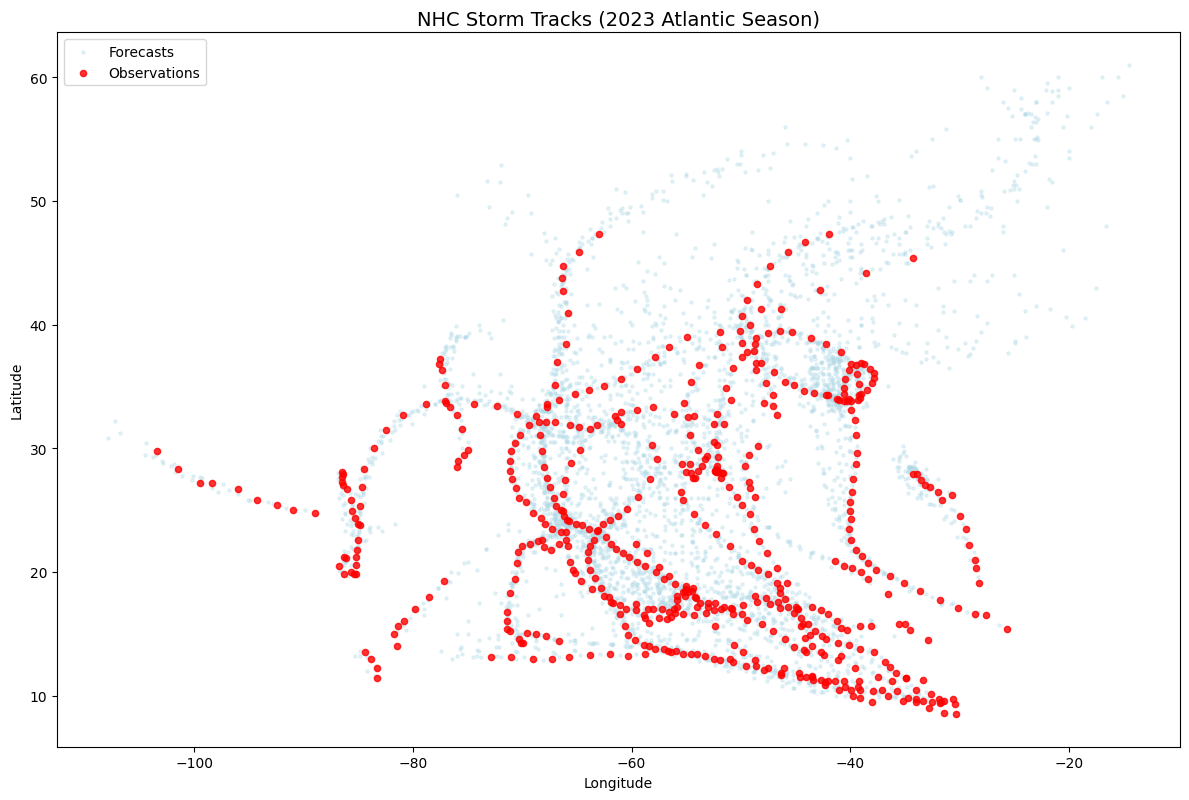

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# Plot forecasts as lines
forecasts.plot(
    ax=ax, color="lightblue", markersize=5, alpha=0.3, label="Forecasts"
)

# Plot observations as larger points
observations.plot(
    ax=ax, color="red", markersize=20, alpha=0.8, label="Observations"
)

ax.set_title("NHC Storm Tracks (2023 Atlantic Season)", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()

### 6. Load Current Storms (Optional)

To get real-time data for currently active storms, use `load_nhc()` without parameters.

In [8]:
# Uncomment to load current active storms
# df_current = lens.nhc.load_nhc()
# df_current_storms = lens.nhc.get_storms(df_current)
# gdf_current_tracks = lens.nhc.get_tracks(df_current)